In [35]:
import numpy as np
from numpy import float32
import warnings
import os
import glob
import tensorflow as tf
import cv2
from sklearn import utils
from sklearn import preprocessing
import matplotlib.pyplot as plt

import tensorflow.keras.backend as K
from tensorflow.keras.applications import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import *
from tensorflow.keras.utils import *
from tensorflow.keras import layers

from data_augmentation import *

In [36]:
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [37]:
TRAIN_DATA_DIR = './data/train'
VAL_DATA_DIR = './data/val'
TEST_DATA_DIR = './data/test'

AUG_TRAIN_DATA_DIR = './data_augmented/train'
AUG_VAL_DATA_DIR = './data_augmented/val'
AUG_TEST_DATA_DIR = './data_augmented/test'

In [38]:
for subdir, dirs, files in os.walk(AUG_TRAIN_DATA_DIR):
    for file in files:
        filepath = os.path.join(subdir, file)
        img = np.load(filepath)
        # rotated_imgs = [rotate_img(img, 90), rotate_img(img, 180), rotate_img(img, 270)]
        # for idx, rot_img in enumerate(rotated_imgs):
        #     rotated_img_save = os.path.join(subdir, f'{file}_{idx}_rot')
        #     np.save(rotated_img_save, rot_img)
            
        fliplr_img = np.fliplr(img)
        flipud_img = np.flipud(img)
        
        fliplr_img_save = os.path.join(subdir, f'{file}_fliplr')
        flipud_img_save = os.path.join(subdir, f'{file}_flipud')
        
        np.save(fliplr_img_save, fliplr_img)
        np.save(flipud_img_save, flipud_img)
        
        # translated_img = translate(img)
        # translated_img_save = os.path.join(subdir, f'{file}_trans')
        # np.save(translated_img_save, translated_img)

In [39]:
# def get_one_hot(targets, nb_classes):
#     res = np.eye(nb_classes)[np.array(targets).reshape(-1)]
#     return res.reshape(list(targets.shape)+[nb_classes])

In [40]:
# def delete_files(folder):
#     for filename in os.listdir(folder):
#         file_path = os.path.join(folder, filename)
#         try:
#             if os.path.isfile(file_path) or os.path.islink(file_path):
#                 os.unlink(file_path)
#             elif os.path.isdir(file_path):
#                 shutil.rmtree(file_path)
#         except Exception as e:
#             print('Failed to delete %s. Reason: %s' % (file_path, e))

In [41]:
# def prepare_data(source_dir, save_data_dir):
#     arr = []
#     for subdir, dirs, files in os.walk(source_dir):
#         for sd in dirs:
#             im_files = []
#             p = os.path.join(source_dir, sd)
#             for subdir, dirs, files in os.walk(p):
#                 for f in files:
#                     im_files.append(f)
#             im_files = sorted(im_files)
#             if len(im_files) == 0:
#                 continue
#             last_file = im_files[-1]
#             file_name = os.path.join(subdir, last_file)
#             data = np.load(file_name)
#             # data = normalize(data)
#             data = cv2.resize(data, (128, 128), interpolation = cv2.INTER_AREA)
#             np.save(f'{save_data_dir}/{last_file}', data)

In [42]:
# def get_data_array(data_dir):
#     data = []
#     for subdir, dirs, files in os.walk(data_dir):
#         for f in files:
#             file_name = os.path.join(subdir, f)
#             data.append(np.load(file_name))
    
#     return np.array(data)

In [43]:
# delete_files(f'{TRAIN_DATA_DIR}/positive')
# delete_files(f'{TRAIN_DATA_DIR}/negative')
        
# prepare_data('./LSTM_data/flare_start_prediction/train/positive', f'{TRAIN_DATA_DIR}/positive')
# # prepare_data('./LSTM_data/flare_start_prediction/train/negative', f'{TRAIN_DATA_DIR}/negative')

# # prepare_data('./LSTM_data/flare_start_prediction/test/positive', f'{TEST_DATA_DIR}/positive')
# # prepare_data('./LSTM_data/flare_start_prediction/test/negative', f'{TEST_DATA_DIR}/negative')

In [44]:
# test_x_pos = get_data_array(f'{TEST_DATA_DIR}/positive')
# test_x_pos = np.expand_dims(test_x_pos, axis=3)
# test_x_pos = tf.convert_to_tensor(test_x_pos)

# test_x_neg = get_data_array(f'{TEST_DATA_DIR}/negative')
# test_x_neg = np.expand_dims(test_x_neg, axis=3)
# test_x_neg = tf.convert_to_tensor(test_x_neg)

# test_x = Concatenate(axis=0)([test_x_pos, test_x_neg])

# test_y_pos = np.ones((test_x_pos.shape[0]), dtype=int)
# test_y_pos = get_one_hot(test_y_pos, 2)
# test_y_neg = np.zeros((test_x_neg.shape[0]), dtype=int)
# test_y_neg = get_one_hot(test_y_neg, 2)

# test_y = np.append(test_y_pos, test_y_neg, axis=0)

In [45]:
# train_x_pos = get_data_array(f'{TRAIN_DATA_DIR}/positive')
# train_x_pos = np.expand_dims(train_x_pos, axis=3)
# # train_x_flipped_pos = tf.convert_to_tensor(FlipImages(train_x_pos))
# train_x_flipped_pos = FlipImages(train_x_pos)
# # train_x_flipped_pos = tf.reshape(train_x_flipped_pos, (train_x_flipped_pos.shape[0]*train_x_flipped_pos.shape[1], train_x_flipped_pos.shape[2], train_x_flipped_pos.shape[3], 1))
# train_x_pos = tf.convert_to_tensor(train_x_pos)
# train_x_pos = Concatenate(axis=0)([train_x_pos, train_x_flipped_pos])
# train_x_pos = tf.random.shuffle(train_x_pos)

# # train_x_pos = np.array(preprocessing.minmax_scale(train_x_pos, (0, 255)), dtype=int)[0]
# print(f'train_x_pos = {train_x_pos.shape}')

# train_x_neg = get_data_array(f'{TRAIN_DATA_DIR}/negative')
# train_x_neg = np.expand_dims(train_x_neg, axis=3)
# # train_x_flipped_neg = tf.convert_to_tensor(FlipImages(train_x_neg))
# train_x_flipped_neg = FlipImages(train_x_neg)
# # train_x_flipped_neg = tf.reshape(train_x_flipped_neg, (train_x_flipped_neg.shape[0]*train_x_flipped_neg.shape[1], train_x_flipped_neg.shape[2], train_x_flipped_neg.shape[3], 1))
# train_x_neg = tf.convert_to_tensor(train_x_neg)
# train_x_neg = Concatenate(axis=0)([train_x_neg, train_x_flipped_neg])
# train_x_neg = tf.random.shuffle(train_x_neg)

# # train_x_neg = np.array(preprocessing.minmax_scale(train_x_neg, (0, 255)), dtype=int)[0]
# print(f'train_x_neg = {train_x_neg.shape}')

# train_y_pos = np.ones((train_x_pos.shape[0]), dtype=int)
# train_y_pos = get_one_hot(train_y_pos, 2)
# train_y_neg = np.zeros((train_x_neg.shape[0]), dtype=int)
# train_y_neg = get_one_hot(train_y_neg, 2)

# val_split = 0.1
# val_data_len = int((train_x_pos.shape[0]+train_x_neg.shape[0]) // 2 * val_split)
# val_x_pos = train_x_pos[-val_data_len:]
# val_x_neg = train_x_neg[-val_data_len:]

# # val_x_pos = np.array(preprocessing.minmax_scale(val_x_pos, (0, 255)), dtype=int)[0]
# # val_x_neg = np.array(preprocessing.minmax_scale(val_x_neg, (0, 255)), dtype=int)[0]

# print(f'val_x_pos = {val_x_pos.shape}')
# print(f'val_x_neg = {val_x_neg.shape}')

# train_x_pos = train_x_pos[:-val_data_len]
# train_x_neg = train_x_neg[:-val_data_len]

# val_y_pos = train_y_pos[-val_data_len:]
# val_y_neg = train_y_neg[-val_data_len:]

# train_y_pos = train_y_pos[:-val_data_len]
# train_y_neg = train_y_neg[:-val_data_len] 

# # x_train = np.append(train_x_pos, train_x_neg, axis=0)
# y_train = np.append(train_y_pos, train_y_neg, axis=0)

# y_train = tf.convert_to_tensor(y_train)
# x_train = tf.keras.layers.Concatenate(axis=0)([train_x_pos, train_x_neg])
# val_x = Concatenate(axis=0)([val_x_pos, val_x_neg])
# val_y = Concatenate(axis=0)([val_y_pos, val_y_neg])

In [46]:
class CustomDataGen(tf.keras.utils.Sequence):
    
    def __init__(self, files_paths,
                 batch_size,
                 input_size=(128, 128, 1),
                 shuffle=True):
        
        self.files_paths = files_paths.copy()
        self.batch_size = batch_size
        self.input_size = input_size
        self.shuffle = shuffle
        
        self.n = len(self.files_paths)
        self.n_category = 2
        # self.n_name = df[y_col['name']].nunique()
        # self.n_type = df[y_col['type']].nunique()
    
    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.files_paths)
    
    def __getitem__(self, index):
        batches = self.files_paths[index * self.batch_size:(index + 1) * self.batch_size]
        X, y = self.__get_data(batches)        
        return X, y
    
    def __len__(self):
        return self.n // self.batch_size
    
    def __get_input(self, path):
        image = np.load(path)
        image = cv2.resize(image, (128, 128), interpolation = cv2.INTER_AREA)
        return image

    def __get_output(self, path, num_classes=2):
        label = None
        folder = path.rsplit('/')[-2]
        if folder == 'positive':
            label = 1
        elif folder == 'negative':
            label = 0
        return tf.keras.utils.to_categorical(label, num_classes=num_classes)
    
    def __get_data(self, batches):
        # Generates data containing batch_size samples
        # path_batch = batches[self.X_col['path']]
        # category_batch = batches[self.y_col['type']]

        X_batch = np.asarray([self.__get_input(x) for x in batches])
        y_batch = np.asarray([self.__get_output(y, self.n_category) for y in batches])

        return X_batch, y_batch

In [58]:
def identity_block(input_tensor, kernel_size, filters, stage, block):
  
    filters1, filters2, filters3 = filters
    if K.image_data_format() == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = Conv2D(filters1, (1, 1), name=conv_name_base + '2a')(input_tensor)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size,
               padding='same', name=conv_name_base + '2b')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1), name=conv_name_base + '2c')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    x = layers.add([x, input_tensor])
    x = Activation('relu')(x)
    return x

In [59]:
def conv_block(input_tensor, kernel_size, filters, stage, block, strides=(2, 2)):
   
    filters1, filters2, filters3 = filters
    if K.image_data_format() == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = Conv2D(filters1, (1, 1), strides=strides,
               name=conv_name_base + '2a')(input_tensor)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, padding='same',
               name=conv_name_base + '2b')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1), name=conv_name_base + '2c')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    shortcut = Conv2D(filters3, (1, 1), strides=strides,
                      name=conv_name_base + '1')(input_tensor)
    shortcut = BatchNormalization(axis=bn_axis, name=bn_name_base + '1')(shortcut)

    x = layers.add([x, shortcut])
    x = Activation('relu')(x)
    return x

In [115]:
def ResNet50(include_top=True, weights=None,
             input_tensor=None, input_shape=None,
             pooling=None,
             classes=2):
    """Instantiates the ResNet50 architecture.
    Optionally loads weights pre-trained
    on ImageNet. Note that when using TensorFlow,
    for best performance you should set
    `image_data_format="channels_last"` in your Keras config
    at ~/.keras/keras.json.
    The model and the weights are compatible with both
    TensorFlow and Theano. The data format
    convention used by the model is the one
    specified in your Keras config file.
    # Arguments
        include_top: whether to include the fully-connected
            layer at the top of the network.
        weights: one of `None` (random initialization)
            or "imagenet" (pre-training on ImageNet).
        input_tensor: optional Keras tensor (i.e. output of `layers.Input()`)
            to use as image input for the model.
        input_shape: optional shape tuple, only to be specified
            if `include_top` is False (otherwise the input shape
            has to be `(224, 224, 3)` (with `channels_last` data format)
            or `(3, 224, 244)` (with `channels_first` data format).
            It should have exactly 3 inputs channels,
            and width and height should be no smaller than 197.
            E.g. `(200, 200, 3)` would be one valid value.
        pooling: Optional pooling mode for feature extraction
            when `include_top` is `False`.
            - `None` means that the output of the model will be
                the 4D tensor output of the
                last convolutional layer.
            - `avg` means that global average pooling
                will be applied to the output of the
                last convolutional layer, and thus
                the output of the model will be a 2D tensor.
            - `max` means that global max pooling will
                be applied.
        classes: optional number of classes to classify images
            into, only to be specified if `include_top` is True, and
            if no `weights` argument is specified.
    # Returns
        A Keras model instance.
    # Raises
        ValueError: in case of invalid argument for `weights`,
            or invalid input shape.
    """
    if weights not in {'imagenet', None}:
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization) or `imagenet` '
                         '(pre-training on ImageNet).')

    #if weights == 'imagenet' and include_top and classes != 15:
    #    raise ValueError('If using `weights` as imagenet with `include_top`'
    #                     ' as true, `classes` should be 15')

    # Determine proper input shape
    
    # input_shape = _obtain_input_shape(input_shape,
    #                                   default_size=256,
    #                                   min_size=197,
    #                                   data_format=K.image_data_format(),
    #                                   require_flatten=include_top)
    
    input_shape = (128, 128, 1)

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor
            
    print(K.image_data_format())
    if K.image_data_format() == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1

    x = ZeroPadding2D((3, 3))(img_input)
    x = Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(x)
    x = BatchNormalization(axis=bn_axis, name='bn_conv1')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = conv_block(x, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1))
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='b')
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='c')

    x = conv_block(x, 3, [128, 128, 512], stage=3, block='a')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='b')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='c')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='d')

    x = conv_block(x, 3, [256, 256, 1024], stage=4, block='a')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='b')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='c')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='d')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='e')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='f')

    x = conv_block(x, 3, [512, 512, 2048], stage=5, block='a')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='b')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='c')

    x = AveragePooling2D((4, 4), name='avg_pool')(x)

#     # x = Flatten()(x)
#     # x = Dense(1, activation='sigmoid', name='fc2')(x)
    
#     if include_top:
#         x = Flatten()(x)
#         x = Dense(2, activation='softmax', name='fc2')(x)
#     else:
#         if pooling == 'avg':
#             x = GlobalAveragePooling2D()(x)
#         elif pooling == 'max':
#             x = GlobalMaxPooling2D()(x)

    x = GlobalAveragePooling2D()(x)
    x = Dense(2, activation = 'softmax')(x)

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input
    # Create model.
    model = Model(inputs, x, name='resnet50')

    return model

In [116]:
train_files = []
for subdir, dirs, files in os.walk(AUG_TRAIN_DATA_DIR):
     for f in files:
        train_files.append(os.path.join(subdir, f))
train_files = np.array(train_files)

val_files = []
for subdir, dirs, files in os.walk(AUG_VAL_DATA_DIR):
     for f in files:
        val_files.append(os.path.join(subdir, f))
val_files = np.array(val_files)

In [117]:
test_files = []
for subdir, dirs, files in os.walk(AUG_TEST_DATA_DIR):
     for f in files:
        test_files.append(os.path.join(subdir, f))
test_files = np.array(test_files)

In [124]:
t = np.load('./data_augmented/train/negative/AIA20100712_0436_0094.npy_flipud.npy')

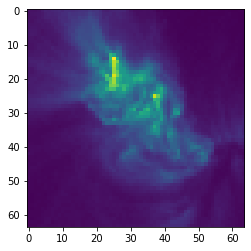

In [125]:
plt.imshow(t)

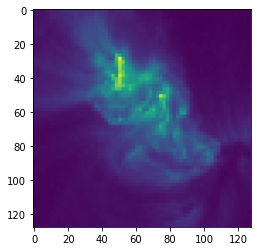

In [126]:
t1 = cv2.resize(t, (128, 128), interpolation = cv2.INTER_AREA)
plt.imshow(t1)

In [121]:
traingen = CustomDataGen(train_files, 64)
valgen = CustomDataGen(val_files, 64)

In [122]:
epochs = 100
# batch_size = 16
# steps_per_epoch = generator_train.n // batch_size
# steps_per_epoch = x_train.shape[0] // batch_size
# print(steps_per_epoch)

model = ResNet50(include_top=True)
# model.summary()

channels_last


In [123]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(traingen, validation_data = valgen, epochs=epochs)

Epoch 1/100
78/78 [==============================] - 17s 143ms/step - loss: 1.1221 - accuracy: 0.5923 - val_loss: 1.4234 - val_accuracy: 0.5208
Epoch 2/100
78/78 [==============================] - 10s 132ms/step - loss: 0.7494 - accuracy: 0.5038 - val_loss: 0.8945 - val_accuracy: 0.5208
Epoch 3/100
78/78 [==============================] - 11s 140ms/step - loss: 0.7246 - accuracy: 0.5214 - val_loss: 0.7273 - val_accuracy: 0.5000
Epoch 4/100
78/78 [==============================] - 10s 131ms/step - loss: 0.7044 - accuracy: 0.5284 - val_loss: 0.7095 - val_accuracy: 0.5260
Epoch 5/100
78/78 [==============================] - 10s 132ms/step - loss: 0.7052 - accuracy: 0.5433 - val_loss: 0.7070 - val_accuracy: 0.4896
Epoch 6/100
78/78 [==============================] - 10s 131ms/step - loss: 0.6994 - accuracy: 0.5319 - val_loss: 1.8357 - val_accuracy: 0.5104
Epoch 7/100
78/78 [==============================] - 10s 131ms/step - loss: 0.7013 - accuracy: 0.5294 - val_loss: 0.7508 - val_accuracy:

KeyboardInterrupt: 

In [ ]:
# test_x_pos = get_data_array(f'{TEST_DATA_DIR}/positive')
# test_x_neg = get_data_array(f'{TEST_DATA_DIR}/negative')
# test_x = np.append(test_x_pos, test_x_neg, axis=0)

# test_y_pos = np.ones((test_x_pos.shape[0]), dtype=int)

# test_y_neg = np.zeros((test_x_neg.shape[0]), dtype=int)
# test_y = np.append(test_y_pos, test_y_neg, axis=0)

In [ ]:
test_data = []
test_data_y = []
for f in test_files:
    label = f.split('/')[-2]
    num_label = 0
    if label == 'positive':
        num_label = 1
    hot_enc_label = np.zeros(2)
    hot_enc_label[num_label] = 1
    test_data_y.append(hot_enc_label)
    image = np.load(f)
    image = cv2.resize(image, (128, 128), interpolation = cv2.INTER_AREA)
    image.reshape(128, 128, 1)
    test_data.append(image)
test_data = np.array(test_data)
test_data_y = np.array(test_data_y)

In [ ]:
predictions = model.predict(test_data)

In [ ]:
preds = []
for idx, p in enumerate(predictions):
    p_largest = p.argmax()
    pred = np.zeros(2)
    pred[p_largest] = 1
    preds.append(pred)

In [ ]:
test_data_y

In [ ]:
preds

In [ ]:
right = 0
wrong = 0
for idx, p in enumerate(predictions):
    p_largest = 0
    if p[1] > p[0]:
        p_largest = 1
    t_largest = 0
    if val_y[idx][1] > val_y[idx][0]:
        t_largest = 1
    if p_largest == t_largest:
        right+=1
    else:
        wrong+=1
    # print(f'P: {pred}\tT: {y_train[idx]}')

print(f'right: {right} wrong: {wrong} accuracy: {right/(right+wrong)}')

In [ ]:
norm_test_x = []
for x in test_x:
    norm_test_x.append(normalize(x))

norm_test_x = np.array(norm_test_x)
norm_test_x = np.expand_dims(norm_test_x, axis=3)

In [ ]:
right, wrong = 0, 0
for idx, p in enumerate(preds):
    p_argmax = p.argmax()
    t_argmax = val_y[idx].argmax()
    if p_argmax == t_argmax:
        right+=1
    else:
        wrong+=1
print(f'right: {right} wrong: {wrong} accuracy: {right/(right+wrong)}')
    # print(f'{p} {test_y[idx]}')

In [ ]:
predictions[2]

In [ ]:
y_train[2]

In [ ]:
correct = 0
for idx, p in enumerate(predictions):
    p_largest = p.argmax()
    t_largest = y_train[idx].argmax()
    if p_largest == t_largest:
        correct +=1
    pred = np.zeros(2)
    pred[p_largest] = 1
    print(f'P: {pred}\tT: {test_y[idx]}')

print(f'accuracy: {correct/predictions.shape[0]*100}')

In [ ]:
folder_path = f'{TRAIN_DATA_DIR}/positive'
files = os.listdir(folder_path)

def test_generator():
    for file in files:
        im = np.load(os.path.join(folder_path, file))
        yield im

In [ ]:
dataset = tf.data.Dataset.from_generator(test_generator, output_shapes=(128, 128), output_types=(tf.float32))

In [ ]:
next(iter(dataset.batch(8))).shape

In [ ]:
cdg = CustomDataGen(data_files, 32)

In [ ]:
x, y = cdg[0]

In [ ]:
y

In [ ]:
test_image = np.load(data_files[0])

In [ ]:
test_image = cv2.rotate(test_image, 180)

In [ ]:
plt.imshow(test_image)